In [133]:
# Initialize Otter
import otter
grader = otter.Notebook("HW_05.ipynb")

In [134]:
rng_seed = 42

## Homework 5

## <em> Markov Chain Simulation and Hierarchical Model</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

### Imports

In [135]:
import numpy as np
from scipy.integrate import quad
#For plotting?
import matplotlib.pyplot as plt
%matplotlib inline

#### Problem 1 - Simulated Annealing

Reference: Newman, Computational Physics (p. 490-497)<br><br>
For a physical system in equilibrium at temperature $T$, the probability that at any moment the system is in a state $i$ is given by the Boltzmann probability. Let us assume our system has single unique ground state and let us choose our energy scale so that $E_i = 0$ in the ground state and $E_i > 0$ for all other states. Now suppose we cool down the system to absolute zero. The system will definitely be in the ground state, and consequently one way to find the ground state of the system is to cool it down to $T = 0$.
<br><br>
This in turn suggests a computational strategy for finding the ground state: let us simulate the system at temperature $T$, using the Markov chain Monte Carlo method, then lower the temperature to zero and the system should find its way to the ground state. This same approach could be used to find the minimum of any function, not just the energy of a physical system. we can take any mathematical function $f(x, y, z, ...)$ and treat the independent variables $x, y, z$ as defining a "state" of the system and $f$ as being the energy of that system, then perform a Monte Carlo simulation. Taking the temperature down to zero will again cause the system to fall into its ground state, i.e. the state with the lowest value of $f$, and hence we find the minimum of the function.
<br><br>
However, if the system is cooled rapidly, it can get stuck in a local energy minimum. On the other hand, an annealed system, one that is cooled sufficiently slowly, can find its way to the ground state. Simulated annleaing applies the same idea in a computational setting. It mimics the slow cooling of a material on the computer by using a Monte Carlo simulation with a temperature parameter that is gradually lowered from an initially high value towards zero. The initial temperature should be chosen so that the system equilibrates quickly. To achieve this, we should choose the thermal energy to be significantly greater than the typical energy change accompanying a single Monte Carlo move.
<br><br>
As for the rate of cooling, one typically specifies a "cooling schedule," a trajectory for the temperature as a function of time, and the most common choise is the exponential one:
<br><br>
$$ T = T_0 e^{-t/\tau} $$
<br><br>
where $T_0$ is the initial temperature, and $\tau$ is a time constant. Some trial error may be necessary to find a good value for $\tau$.
<br><br>
As an example of the use of simulated annealing, we will look at one of the most famous optimization problems, traveling salesman problem, which involves finding the shortest route that visits a given set of locations on a map. A salesman wishes to visit $N$ given cities, and we assume that he can travel in a straight line between any pair of citiies. Given the coordinates of the cities, the problem is to devise the shortest tour. It should start and end at the same city, and all cities must be visited at least once. Let us denote the position of the city $i$ by the two-dimensional vector $r_i = (x_i, y_i)$.
<br><br>
Here is the solution:


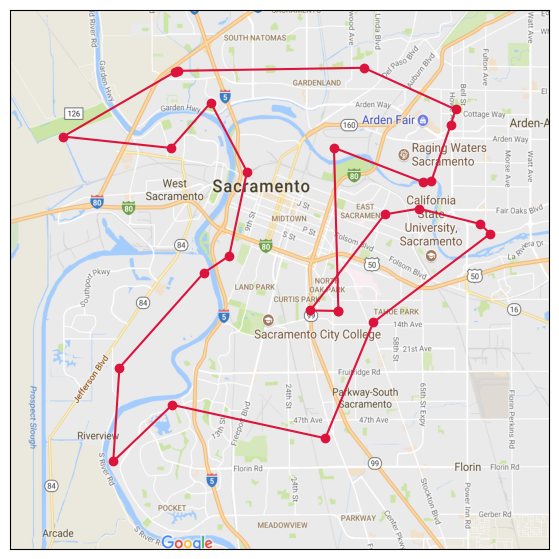

In [136]:
# Traveling salesman (Newman p. 493)
from math import sqrt,exp
from numpy import empty
from random import random,randrange
from imageio.v2 import imread

N = 25
R = 0.02
Tmax = 10.0
Tmin = 1e-3
tau = 1e4

# Function to calculate the magnitude of a vector
def mag(x):
    return sqrt(x[0]**2+x[1]**2)

# Function to calculate the total length of the tour
def distance():
    s = 0.0
    for i in range(N):
        s += mag(r[i+1]-r[i])
    return s

# Choose N city locations and calculate the initial distance
r = empty([N+1,2],float)
for i in range(N):
    r[i,0] = random()
    r[i,1] = random()
r[N] = r[0]
D = distance()

# Main loop
t = 0
T = Tmax
while T>Tmin:

    # Cooling
    t += 1
    T = Tmax*exp(-t/tau)

    # Choose two cities to swap and make sure they are distinct
    i,j = randrange(1,N),randrange(1,N)
    while i==j:
        i,j = randrange(1,N),randrange(1,N)

    # Swap them and calculate the change in distance
    oldD = D
    r[i,0],r[j,0] = r[j,0],r[i,0]
    r[i,1],r[j,1] = r[j,1],r[i,1]
    D = distance()
    deltaD = D - oldD

    # If the move is rejected, swap them back again
    if random()>exp(-deltaD/T):
        r[i,0],r[j,0] = r[j,0],r[i,0]
        r[i,1],r[j,1] = r[j,1],r[i,1]
        D = oldD

plt.figure(figsize = (8, 7))
img = imread("./map_sacramento.png")
plt.plot(r[:,0], r[:,1], 'o-', color = 'crimson', zorder=1)
plt.imshow(img,zorder=0, extent=[-0.1, 1.1, -0.1, 1.1])
plt.xticks([])
plt.yticks([])
plt.show()

Now, consider the function $f(x) = x^2 − \mathrm{cos}(4\pi x)$, which looks like this:

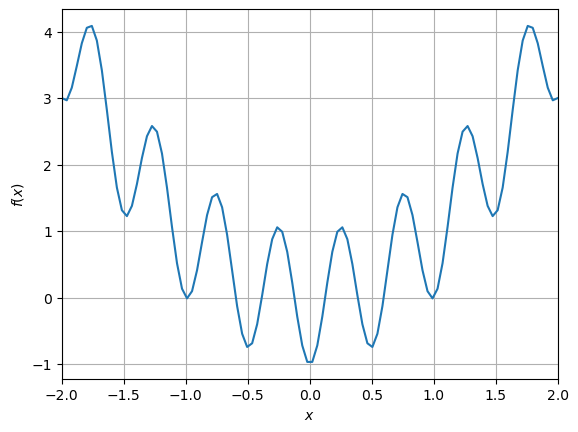

In [137]:
x = np.linspace(-2, 2, 100)
y = x**2 - np.cos(4*np.pi*x)
plt.plot(x, y)
plt.grid(True); plt.xlim(-2, 2); plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.show()

<!-- BEGIN QUESTION -->

Clearly the global minimum of this function is at $x = 0$.

<span style="color:blue"><i> 1. Write a program to confirm this fact using simulated annealing starting at, say, $x = 2$, with Monte Carlo moves of the form $x \rightarrow x + \delta$ where $\delta$ is a random number drawn from a Gaussian distribution with mean zero and standard deviation one. Use an exponential cooling schedule and adjust the start and end temperatures, as well as the exponential constant, until you find values that give good answers in reasonable time. Have your program make a plot of the values of $x$ as a function of time during the run and have it print out the final value of x at the end. You will find the plot easier to interpret if you make it using dots rather than lines, with a statement of the form plot(x,".") or similar. </i></span> <br>

x = -0.00027517821880510744 with f(x) = -0.9999939454303592


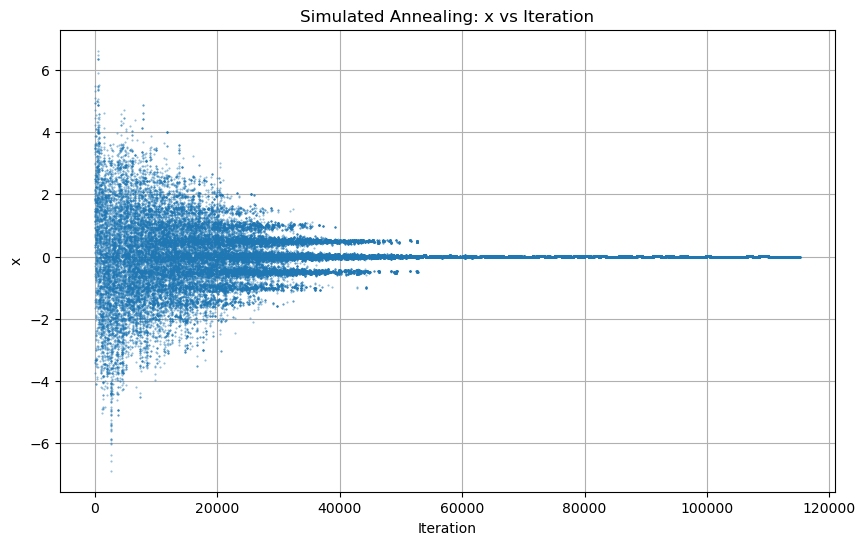

In [138]:
np.random.seed(rng_seed)

# Define the function to minimize
def f(x):
    return x**2 - np.cos(4*np.pi*x)

# Simulated annealing parameters
T0 = 10.0  # Initial temperature
Tmin = 1e-4  # Minimum temperature
tau = 1e4  # Time constant
x = 2.0  # Starting position
fx = f(x)

# Store trajectory
x_history = [x]
t = 0

# Main annealing loop
while T0 * np.exp(-t/tau) > Tmin:
    t += 1
    T = T0 * np.exp(-t/tau)
    
    # Propose a move
    delta = np.random.normal(0, 1)
    x_new = x + delta
    fx_new = f(x_new)
    
    # Metropolis criterion
    if fx_new < fx or np.random.random() < np.exp(-(fx_new - fx) / T):
        x = x_new
        fx = fx_new
    
    x_history.append(x)

print('x = {} with f(x) = {}'.format(x, fx))

# Now Plot:
plt.figure(figsize=(10, 6))
plt.plot(x_history, '.', markersize=1, alpha=0.5)
plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('Simulated Annealing: x vs Iteration')
plt.grid(True)
plt.show()


In [139]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<span style="color:blue"> <i> 2. Now adapt your program to find the minimum of the more complicated function $f(x) = \mathrm{cos}(x) + \mathrm{cos}(\sqrt{2}x) + \mathrm{cos}(\sqrt{3}x)$ in the range $0 < x < 50$. Plot the function as well along this range

</i></span><br><br>
(Hint: The correct answer is around $x = 16$, but there are also competing minima around $x = 2$ and $x = 42$ that your program might find. In real-world situations, it is often good enough to find any reasonable solution to a problem, not necessarily the absolute best, so the fact that the program sometimes settles on these other solutions is not necessarily a bad thing.)

x = 2.1528948105266665 with f(x) = -2.3775059654132784


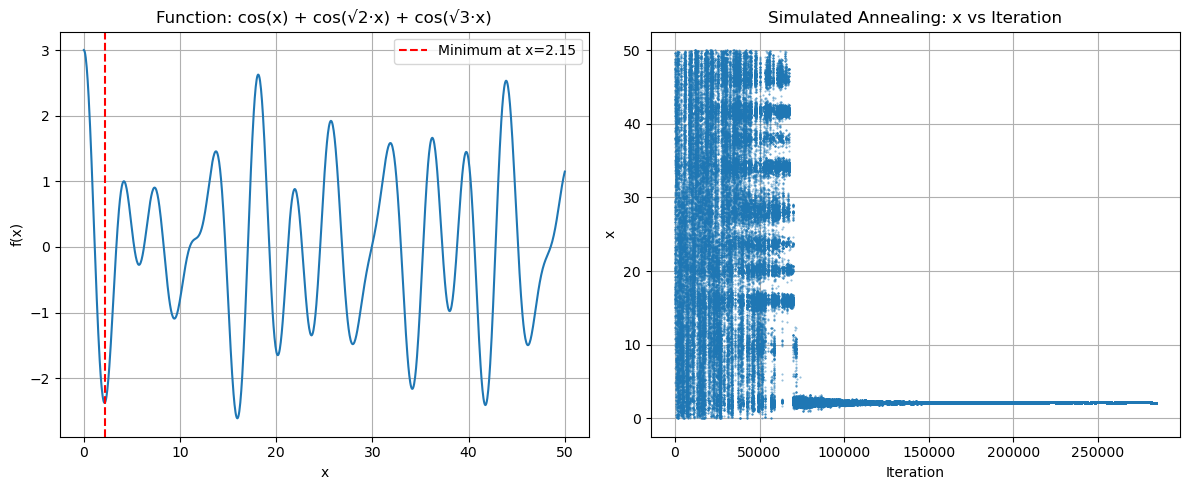

In [140]:
np.random.seed(rng_seed)

def f(x):
    return np.cos(x) + np.cos(np.sqrt(2)*x) + np.cos(np.sqrt(3)*x)

# Simulated annealing parameters
T0 = 15.0  # Initial temperature
Tmin = 1e-5  # Minimum temperature
tau = 2e4  # Time constant
x = 25.0  # Starting position (middle of range)
fx = f(x)

# Store trajectory
x_history = [x]
t = 0

# Main annealing loop
while T0 * np.exp(-t/tau) > Tmin:
    t += 1
    T = T0 * np.exp(-t/tau)
    
    # Propose a move
    delta = np.random.normal(0, 2)
    x_new = x + delta
    
    # Keep within bounds
    if 0 < x_new < 50:
        fx_new = f(x_new)
        
        # Metropolis criterion
        if fx_new < fx or np.random.random() < np.exp(-(fx_new - fx) / T):
            x = x_new
            fx = fx_new
    
    x_history.append(x)

# Fill in the following for the autograder:
x = x  # your optimal x value
fx = f(x)  # f(x) at this value

print('x = {} with f(x) = {}'.format(x, fx))

# Your plots here:
# Plot the function
x_range = np.linspace(0, 50, 1000)
y_range = f(x_range)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_range, y_range)
plt.axvline(x, color='r', linestyle='--', label=f'Minimum at x={x:.2f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function: cos(x) + cos(√2·x) + cos(√3·x)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_history, '.', markersize=1, alpha=0.5)
plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('Simulated Annealing: x vs Iteration')
plt.grid(True)

plt.tight_layout()
plt.show()


In [141]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<!-- END QUESTION -->

***

<!-- BEGIN QUESTION -->

#### Problem 2 - Hierarchial Normal Model

Reference: Gelman et al., Bayesian Data Analysis (p. 288-290)


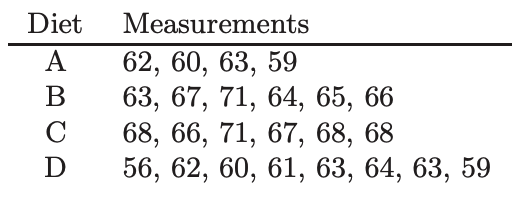

<br><br>
Table 1. Coagulation time in seconds for blood drawn from 24 animals randomly allocated to four different diets. Different treatments have different numbers of observations because the randomization was unrestricted.<br><br>

Under the hierarchical normal model, data $y_{ij}$, for $i = 1, ..., n_j$ and $j = 1, ... ,J$, are independently normally distributed within each of $J$ groups, with means $\theta_j$ and common variance $\sigma^2$. The data is presented in Table 1. (In this case, there are $J = 4$ groups (or 4 sets of experiments - A, B, C, and D), and for each group $j$, we have a data vector $y_j$ with the mean $\theta_j$; $y_j = [y_{1j}, ... , y_{n_j\ j}]$ (there have been $n_j$ observations made.) (e.g. j = 1 represents the diet A group. So $y_{i1} = [y_{11}, y_{21}, y_{31}, y_{41}] = [62, 60, 63, 59]$ with $n_1 = 4.$ <br><br>
The total number of observations is $n = \sum_{j=1}^J n_j$. The group means ($\theta_j$) are assumed to follow a normal distribution with unknown mean $\mu$ and variance $\tau^2$, and a uniform prior distribution is assumed for $(\mu, \mathrm{log}\sigma, \tau)$, with $\sigma > 0$ and $\tau > 0$; equivalently, $p(\mu, \mathrm{log}\sigma, \mathrm{log}\tau) \propto \tau$. <br><br>
The joint posterior density of all the parameters is<br><br>
$$ p(\theta, \mu, \mathrm{log}\sigma, \mathrm{log}\tau\ \vert\ y) \propto p(\mu, \mathrm{log}\sigma, \mathrm{log}\tau) \prod_{j=1}^J \mathrm{Normal}(\theta_j\ \vert\ \mu, \tau^2) \prod_{j=1}^J \prod_{i=1}^{n_j} \mathrm{Normal}(y_{ij}\ \vert\ \theta_j, \sigma^2) $$
<br><br>
where $\mathrm{Normal}(\theta_j\ \vert\ \mu, \tau^2) = \frac{1}{\sqrt{2\pi \tau^2}}\mathrm{exp}(-\frac{(\theta_j-\mu)^2}{2\tau^2})$.
<br><br>
<span style="color:blue"> <i> 1. Now, find the MAP (Maximum A Posteriori) solution to this (find the solution to MAP for all these parameters). In other words, find $\theta_j, \mu, \sigma, \tau$ which maximizes the likelihood. </i></span><br><br>
(Hint: The likelihood is given as $\prod_{j=1}^J \mathrm{Normal}(\theta_j\ \vert\ \mu, \tau^2) \prod_{j=1}^J \prod_{i=1}^{n_j} \mathrm{Normal}(y_{ij}\ \vert\ \theta_j, \sigma^2)$. Take the log of the likelihood and maximize it using scipy.optimize.fmin (https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.fmin.html). Note that you need to make initial guesses on the parameters in order to use fmin. Make a reasonable guess! You can use a different in-built function to maximize the likelihood function. <br>
Caveat: "fmin" minimizes a given function, so you should multiply the log-likelihood by $-1$ in order to maximize it using fmin.)

In [142]:
# Load data
A = np.array([62, 60, 63, 59])
B = np.array([63, 67, 71, 64, 65, 66])
C = np.array([68, 66, 71, 67, 68, 68])
D = np.array([56, 62, 60, 61, 63, 64, 63, 59])

data = []
data.append(A)
data.append(B)
data.append(C)
data.append(D)

In [143]:
from scipy import optimize

def minus_log_likelihood(param, y_i1=data[0], y_i2=data[1], y_i3=data[2], y_i4=data[3]):
    theta1, theta2, theta3, theta4, mu, sigma, tau = param
    
    # Ensure positive variances
    if sigma <= 0 or tau <= 0:
        return np.inf
    
    # Combine all data and thetas
    y_all = [y_i1, y_i2, y_i3, y_i4]
    thetas = [theta1, theta2, theta3, theta4]
    
    log_likelihood = 0
    
    # Prior term: Normal(theta_j | mu, tau^2)
    for theta_j in thetas:
        log_likelihood += -0.5 * np.log(2 * np.pi * tau**2) - (theta_j - mu)**2 / (2 * tau**2)
    
    # Likelihood term: Normal(y_ij | theta_j, sigma^2)
    for j in range(4):
        for y_ij in y_all[j]:
            log_likelihood += -0.5 * np.log(2 * np.pi * sigma**2) - (y_ij - thetas[j])**2 / (2 * sigma**2)
    
    return -log_likelihood


In [144]:
p_tex = ["theta_1", "theta_2", "theta_3", "theta_4", "mu", "sigma", "tau"]

# Initial guess: use sample means for thetas, overall mean for mu, sample std for sigma and tau
initial_guess = [
    np.mean(data[0]),  # theta1
    np.mean(data[1]),  # theta2
    np.mean(data[2]),  # theta3
    np.mean(data[3]),  # theta4
    np.mean([np.mean(d) for d in data]),  # mu
    3.0,  # sigma
    3.0   # tau
]

param_MAP = optimize.fmin(minus_log_likelihood, initial_guess, args=(data[0], data[1], data[2], data[3]))

for ind in range(7):
    print(p_tex[ind], '=', param_MAP[ind])


Optimization terminated successfully.
         Current function value: 62.526371
         Iterations: 355
         Function evaluations: 562
theta_1 = 61.40082773083929
theta_2 = 65.81594595736274
theta_3 = 67.63051740952113
theta_4 = 61.214699871112884
mu = 64.01554036713405
sigma = 2.1797784451843363
tau = 2.7835479741546143


In [145]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

You should find that the MAP solution is dependent on your initial guesses. The point is that the maximal likelihood estimator is biased, even though we have all the parameters.
Hence, it is better to use the Monte Carlo simulation for the parameter estimation; we can also determine posterior quantiles with the Monte Carlo method. First, we will try the <b>Gibbs sampler</b>. <br><br>
<b>Starting points:</b><br>
In this example, we can choose overdispersed starting points for each parameter $\theta_j$ by simply taking random points from the data $y_{ij}$ from group $j$. We obtain 10 starting points for the simulations by drawing $θ_j$ independently in this way for each group. We also need starting points for $\mu$, which can be taken as the average of the starting $θ_j$ values. No starting values are needed for $\tau$ or $\sigma$ as they can be drawn as the first steps in the Gibbs sampler.<br><br>
<b>Conditional posterior distribution of $\sigma^2$:</b><br>
The conditional posterior density for $\sigma^2$ has the form corresponding to a normal variance with known mean; there are $n$ observations $y_{ij}$ with means $\theta_j$. The conditional posterior distribution is<br>
$$ \sigma^2 | \theta, \mu, \tau, y \sim \mathrm{Inv}\mbox{-}\chi^2(n, \hat{\sigma}^2) $$
<br>
where $$\mathrm{Inv}\mbox{-}\chi^2(x|n, \hat{\sigma}^2) = \mathrm{Inv\mbox{-}gamma}\Big(\alpha = \frac{n}{2}, \beta = \frac{n}{2}\hat{\sigma}^2 \Big) = \frac{\beta^\alpha}{\Gamma(\alpha)}x^{-(\alpha+1)}\mathrm{exp}(-\beta/x)$$
<br>
$$ \hat{\sigma}^2 = \frac{1}{n}\sum_{j=1}^J \sum_{i=1}^{n_j} (y_{ij}-\theta_j)^2 $$
<br><br>
(Hint: You can take random samples from the inverse gamma function using scipy.stats.invgamma - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.invgamma.html. <br> invgamma.rvs(alpha, scale = beta, size=1) will take one random sample from $\mathrm{Inv\mbox{-}gamma}(\alpha, \beta)$.)
<br><br>
<b>Conditional posterior distribution of $\tau^2$:</b><br>
Conditional on $y$ and the other parameters in the model, $\mu$ has a normal distribution determined by the $J$ values $\theta_j$:<br>
$$ \tau^2 | \theta, \mu, \sigma, y \sim \mathrm{Inv}\mbox{-}\chi^2(J-1, \hat{\tau}^2) $$
<br>
with $$ \hat{\tau}^2 = \frac{1}{J-1} \sum_{j=1}^J (\theta_j - \mu)^2. $$
<br><br>
<b>Conditional posterior distribution of each $\theta_j$:</b><br>
The factors in the joint posterior density that involve $\theta_j$ are the $N(\mu, \tau^2)$ prior distribution and the normal likelihood from the data in the $j$th group, $y_{ij}$ , $i = 1, ... , n_j$ . The conditional posterior distribution of each $\theta_j$ given the other parameters in the model is <br>
$$ \theta_j | \mu, \sigma, \tau, y \sim \mathrm{Normal}(\hat{\theta_j}, V_{\theta_j}) $$
<br><br>
where the parameters of the conditional posterior distribution depend on $\mu, \sigma, \tau$ as well as $y$:
<br><br>
$$ \hat{\theta_j} = \frac{\frac{1}{\tau^2}\mu + \frac{n_j}{\sigma^2}(\frac{1}{n_j}\sum_{i=1}^{n_j} y_{ij})}{\frac{1}{\tau^2} + \frac{n_j}{\sigma^2}} $$
<br>
$$ V_{\theta_j} = \frac{1}{\frac{1}{\tau^2} + \frac{n_j}{\sigma^2}} $$
<br><br>
These conditional distributions are independent; thus drawing the $\theta_j$’s one at a time is equivalent to drawing the vector $\theta$ all at once from its conditional posterior distribution.
<br><br>
<b>Conditional posterior distribution of $\mu$:</b><br>
Conditional on $y$ and the other parameters in the model, $\mu$ has a normal distribution determined by the $J$ values $\theta_j$:<br>
$$ \mu | \theta, \sigma, \tau, y \sim \mathrm{Normal}(\hat{\mu}, \tau^2/J) $$
<br>
where $\hat{\mu} = \frac{1}{J}\sum_{j=1}^J \theta_j$.

<br><br>
<span style="color:blue"> <i> 2. Define a function which does the Gibbs sampling. Take 100 samples. Remove the first 50 sequences and store the latter half. Repeat this 10 times so that you get ten Gibbs sampler sequences, each of length 50. We have 7 parameters ($\theta_1, ..., \theta_4, \mu, \sigma, \tau$), and for each parameter, you created 10 chains, each of length 50. </i></span>

In [146]:
from scipy.stats import norm, invgamma

def Gibbs_sampling(data):
    # Initialize starting points using group means for better convergence
    theta = np.array([np.mean(data[j]) for j in range(4)])
    mu = np.mean(theta)
    
    # Total number of observations
    n = sum([len(data[j]) for j in range(4)])
    J = 4  # number of groups
    n_j = [len(data[j]) for j in range(4)]
    
    # Store samples
    samples = []
    
    for step in range(150):
        # 1. Sample sigma^2 | theta, mu, tau, y ~ Inv-chi^2(n, sigma_hat^2)
        sigma_hat_sq = 0
        for j in range(4):
            for y_ij in data[j]:
                sigma_hat_sq += (y_ij - theta[j])**2
        sigma_hat_sq /= n
        
        sigma_sq = invgamma.rvs(n/2, scale=n*sigma_hat_sq/2)
        sigma = np.sqrt(sigma_sq)
        
        # 2. Sample tau^2 | theta, mu, sigma, y ~ Inv-chi^2(J-1, tau_hat^2)
        tau_hat_sq = np.sum((theta - mu)**2) / (J - 1)
        tau_sq = invgamma.rvs((J-1)/2, scale=(J-1)*tau_hat_sq/2)
        tau = np.sqrt(tau_sq)
        
        # 3. Sample theta_j | mu, sigma, tau, y ~ Normal(theta_hat_j, V_theta_j)
        for j in range(4):
            y_bar_j = np.mean(data[j])
            
            theta_hat_j = ((mu / tau_sq) + (n_j[j] / sigma_sq) * y_bar_j) / ((1 / tau_sq) + (n_j[j] / sigma_sq))
            V_theta_j = 1 / ((1 / tau_sq) + (n_j[j] / sigma_sq))
            
            theta[j] = np.random.normal(theta_hat_j, np.sqrt(V_theta_j))
        
        # 4. Sample mu | theta, sigma, tau, y ~ Normal(mu_hat, tau^2/J)
        mu_hat = np.mean(theta)
        mu = np.random.normal(mu_hat, np.sqrt(tau_sq / J))
        
        # Store the sample (theta1, theta2, theta3, theta4, mu, sigma, tau)
        samples.append([theta[0], theta[1], theta[2], theta[3], mu, sigma, tau])
    
    # Return only the last 50 samples (after 100 burn-in)
    return np.array(samples[100:])


In [147]:
np.random.seed(rng_seed)

Gibbs_posterior = []

# Run 10 independent chains
for i in range(10):
    samples = Gibbs_sampling(data)
    Gibbs_posterior.append(samples)  # samples shape is (50, 7)

Gibbs_posterior = np.array(Gibbs_posterior)  # Shape: (10, 50, 7)

In [148]:
Gibbs_posterior.shape

(10, 50, 7)

In [149]:
# np.shape(Gibbs_posterior)

In [150]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<span style="color:blue"> <i> 3. Estimate posterior quantiles. Find and print the 2.5%, 25%, 50%, 75%, 97.5% posterior percentiles of all parameters. </i></span><br>
(Hint: You can use np.percentile - https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html.)

In [151]:
def Gibbs_percentile(percent):
    percentiles = []
    for param_idx in range(7):
        # Combine all chains for this parameter
        all_samples = Gibbs_posterior[:, :, param_idx].flatten()
        # Use linear interpolation for more accurate percentile estimation
        percentile_value = np.percentile(all_samples, percent, method='linear')
        percentiles.append(percentile_value)
    return np.array(percentiles)


In [152]:
p_tex = ["theta_1", "theta_2", "theta_3", "theta_4", "mu", "sigma", "tau"]
percentiles = [2.5, 25, 50, 75, 97.5]

print("Posterior Percentiles from Gibbs Sampling:")
print("-" * 70)
for percent in percentiles:
    values = Gibbs_percentile(percent)
    print(f"{percent:5.1f}%: ", end="")
    for i, param in enumerate(p_tex):
        print(f"{param}={values[i]:6.2f}  ", end="")
    print()


Posterior Percentiles from Gibbs Sampling:
----------------------------------------------------------------------
  2.5%: theta_1= 58.77  theta_2= 64.06  theta_3= 65.77  theta_4= 59.50  mu= 55.06  sigma=  1.80  tau=  2.18  
 25.0%: theta_1= 60.31  theta_2= 65.34  theta_3= 67.12  theta_4= 60.49  mu= 62.32  sigma=  2.15  tau=  3.59  
 50.0%: theta_1= 61.15  theta_2= 65.95  theta_3= 67.77  theta_4= 61.12  mu= 64.07  sigma=  2.38  tau=  4.94  
 75.0%: theta_1= 62.02  theta_2= 66.60  theta_3= 68.36  theta_4= 61.70  mu= 65.57  sigma=  2.68  tau=  7.99  
 97.5%: theta_1= 63.84  theta_2= 67.97  theta_3= 69.61  theta_4= 62.97  mu= 73.66  sigma=  3.38  tau= 29.97  


In [153]:
grader.check("q2.3")

q2.3 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<span style="color:blue"> <i> 4. Now, test for convergence using "Gelman-Rubin statistic." For all seven parameters, compute $R$ and determine if the condition $R < 1.1$ is satisfied.  </i></span><br><br>
For a given parameter $\theta$, the $R$ statistic compares the variance across chains with the variance within a chain.
<br>Given chains $J=1,\ldots,m$, each of length $n$, <br>
Let $B=\frac{n}{m-1} \sum_j \left(\bar{\theta}_j - \bar{\theta}\right)^2$, where $\bar{\theta_j}$ is the average $\theta$ for chain $j$ and $\bar{\theta}$ is the global average. This is proportional to the variance of the individual-chain averages for $\theta$.<br>
Let $W=\frac{1}{m}\sum_j s_j^2$, where $s_j^2$ is the estimated variance of $\theta$ within chain $j$. This is the average of the individual-chain variances for $\theta$.<br>
Let $V=\frac{n-1}{n}W + \frac{1}{n}B$. This is an estimate for the overall variance of $\theta$.
<br><br>
Finally, $R=\sqrt{\frac{V}{W}}$. We'd like to see $R\approx 1$ (e.g. $R < 1.1$ is often used). Note that this calculation can also be used to track convergence of combinations of parameters, or anything else derived from them.

In [154]:
p_tex = np.array([r'$theta_1$', r'$theta_2$', r'$theta_3$', r'$theta_4$', r'$mu$', r'$tau$', r'$sigma$'])

m = 10  # number of chains
n = 50  # length of each chain

W = np.zeros(7)
V = np.zeros(7)

for param_idx in range(7):
    # Extract all chains for this parameter
    chains = Gibbs_posterior[:, :, param_idx]  # Shape: (10, 50)
    
    # Calculate chain means and overall mean
    chain_means = np.mean(chains, axis=1)  # Mean for each chain
    overall_mean = np.mean(chain_means)  # Overall mean
    
    # Calculate B: between-chain variance
    B = n / (m - 1) * np.sum((chain_means - overall_mean)**2)
    
    # Calculate W: within-chain variance
    chain_variances = np.var(chains, axis=1, ddof=1)  # Variance for each chain
    W[param_idx] = np.mean(chain_variances)
    
    # Calculate V: overall variance estimate
    V[param_idx] = ((n - 1) / n) * W[param_idx] + (1 / n) * B
    
    # Calculate R statistic
    R = np.sqrt(V[param_idx] / W[param_idx])
    
    print(f"{p_tex[param_idx]:10s}: R = {R:.4f}, {'CONVERGED' if R < 1.1 else 'NOT CONVERGED'}")


$theta_1$ : R = 0.9959, CONVERGED
$theta_2$ : R = 1.0004, CONVERGED
$theta_3$ : R = 1.0022, CONVERGED
$theta_4$ : R = 1.0008, CONVERGED
$mu$      : R = 0.9995, CONVERGED
$tau$     : R = 0.9986, CONVERGED
$sigma$   : R = 1.0032, CONVERGED


In [155]:
grader.check("q2.4")

q2.4 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Now, try the <b>Metropolis algorithm</b>.

<span style="color:blue"> <i> 5. Run ten parallel sequences of Metropolis algorithm simulations using the package "emcee" (http://dfm.io/emcee/current/). First, define the log of prior (already given to you), likelihood, and posterior (Hint: http://dfm.io/emcee/current/user/line/) </i></span><br>

In [156]:
%pip install emcee corner -q
import emcee


Note: you may need to restart the kernel to use updated packages.


In [157]:
def log_prior(param):
    theta1, theta2, theta3, theta4, mu, sigma, tau = param
    if sigma > 0 and tau > 0:
        return 0.0
    return -np.inf

def log_likelihood(param, data0, data1, data2, data3):
    theta1, theta2, theta3, theta4, mu, sigma, tau = param
    
    if sigma <= 0 or tau <= 0:
        return -np.inf
    
    y_all = [data0, data1, data2, data3]
    thetas = [theta1, theta2, theta3, theta4]
    
    log_like = 0
    
    # Prior: Normal(theta_j | mu, tau^2)
    for theta_j in thetas:
        log_like += -0.5 * np.log(2 * np.pi * tau**2) - (theta_j - mu)**2 / (2 * tau**2)
    
    # Likelihood: Normal(y_ij | theta_j, sigma^2)
    for j in range(4):
        for y_ij in y_all[j]:
            log_like += -0.5 * np.log(2 * np.pi * sigma**2) - (y_ij - thetas[j])**2 / (2 * sigma**2)
    
    return log_like

def log_posterior(param, data0, data1, data2, data3):
    lp = log_prior(param)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(param, data0, data1, data2, data3)


In [158]:
grader.check("q2.5")

q2.5 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<span style="color:blue"> <i> 6. Now, try different number of MCMC walkers and burn-in period, and number of MCMC steps. At which point do you obtain similar results to those obtained
using Gibbs sampling? Run the MCMC chain and estimate posterior quantiles as in Part 3. </i></span><br>

In [159]:
np.random.seed(rng_seed)

emcee_trace = []
for i in range(10):
    # Here we'll set up the computation. emcee combines multiple "walkers",
    # each of which is its own MCMC chain. The number of trace results will
    # be nwalkers * nsteps

    ndim = 7  # number of parameters in the model
    nwalkers = 50  # number of MCMC walkers
    nburn = 500 # "burn-in" period to let chains stabilize
    nsteps = 1000  # number of MCMC steps to take

    # Starting guesses: scatter around reasonable central values
    # Use means of data as centers
    center = np.array([
        np.mean(data[0]),  # theta1
        np.mean(data[1]),  # theta2
        np.mean(data[2]),  # theta3
        np.mean(data[3]),  # theta4
        np.mean([np.mean(d) for d in data]),  # mu
        2.5,  # sigma
        3.0   # tau
    ])
    
    # Add random perturbations to create linearly independent starting points
    starting_guesses = center + 1e-4 * np.random.randn(nwalkers, ndim)

    # Here's the function call where all the work happens:

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data[0], data[1], data[2], data[3]])
    sampler.run_mcmc(starting_guesses, nsteps, progress=False)
    print(f"Chain {i+1} done")

    emcee_trace.append(sampler.chain[:, nburn:, :].reshape(-1, ndim).T)

emcee_trace = np.array(emcee_trace)


Chain 1 done
Chain 2 done
Chain 2 done
Chain 3 done
Chain 3 done
Chain 4 done
Chain 4 done
Chain 5 done
Chain 5 done
Chain 6 done
Chain 6 done
Chain 7 done
Chain 7 done
Chain 8 done
Chain 8 done
Chain 9 done
Chain 9 done
Chain 10 done
Chain 10 done


In [160]:
np.shape(emcee_trace)

(10, 7, 25000)

In [161]:
def emcee_percentile(percent):
    percentiles = []
    for param_idx in range(7):
        # Combine all chains for this parameter
        all_samples = emcee_trace[:, param_idx, :].flatten()
        percentile_value = np.percentile(all_samples, percent)
        percentiles.append(percentile_value)
    return np.array(percentiles)


In [162]:
p_tex = ["theta_1", "theta_2", "theta_3", "theta_4", "mu", "sigma", "tau"]
percentiles = [2.5, 25, 50, 75, 97.5]

print("Posterior Percentiles from emcee:")
print("-" * 70)
for percent in percentiles:
    values = emcee_percentile(percent)
    print(f"{percent:5.1f}%: ", end="")
    for i, param in enumerate(p_tex):
        print(f"{param}={values[i]:6.2f}  ", end="")
    print()


Posterior Percentiles from emcee:
----------------------------------------------------------------------
  2.5%: theta_1= 58.79  theta_2= 63.82  theta_3= 65.57  theta_4= 59.39  mu= 55.25  sigma=  1.87  tau=  1.91  
 25.0%: theta_1= 60.44  theta_2= 65.20  theta_3= 67.05  theta_4= 60.54  mu= 62.29  sigma=  2.23  tau=  3.45  
 50.0%: theta_1= 61.28  theta_2= 65.88  theta_3= 67.75  theta_4= 61.13  mu= 64.05  sigma=  2.48  tau=  5.05  
 75.0%: theta_1= 62.10  theta_2= 66.56  theta_3= 68.44  theta_4= 61.71  mu= 65.79  sigma=  2.78  tau=  8.00  
 97.5%: theta_1= 63.82  theta_2= 67.89  theta_3= 69.79  theta_4= 62.98  mu= 73.86  sigma=  3.54  tau= 28.81  


In [163]:
import corner
fig = corner.corner(emcee_trace[0, :, :].T, labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$", r"$\theta_4$", r"$\mu$", r"$\sigma$", r"$\tau$"], quantiles=[0.16, 0.5, 0.84], range = 0.95*np.ones(7))


In [164]:
grader.check("q2.6")

q2.6 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<span style="color:blue"> <i> 7. Test for convergence using Gelman-Rubin statistic as in Part 4. </i></span><br>

In [165]:
len(emcee_trace[0][0])

25000

In [166]:
p_tex = np.array([r'$theta_1$', r'$theta_2$', r'$theta_3$', r'$theta_4$', r'$mu$', r'$tau$', r'$sigma$'])

m = 10  # number of chains
n = len(emcee_trace[0][0])  # length of each chain

W = np.zeros(7)
V = np.zeros(7)

for param_idx in range(7):
    # Extract all chains for this parameter
    chains = emcee_trace[:, param_idx, :]  # Shape: (10, n)
    
    # Calculate chain means and overall mean
    chain_means = np.mean(chains, axis=1)  # Mean for each chain
    overall_mean = np.mean(chain_means)  # Overall mean
    
    # Calculate B: between-chain variance
    B = n / (m - 1) * np.sum((chain_means - overall_mean)**2)
    
    # Calculate W: within-chain variance
    chain_variances = np.var(chains, axis=1, ddof=1)  # Variance for each chain
    W[param_idx] = np.mean(chain_variances)
    
    # Calculate V: overall variance estimate
    V[param_idx] = ((n - 1) / n) * W[param_idx] + (1 / n) * B
    
    # Calculate R statistic
    R = np.sqrt(V[param_idx] / W[param_idx])
    
    print(f"{p_tex[param_idx]:10s}: R = {R:.4f}, {'CONVERGED' if R < 1.1 else 'NOT CONVERGED'}")


$theta_1$ : R = 1.0015, CONVERGED
$theta_2$ : R = 1.0021, CONVERGED
$theta_3$ : R = 1.0011, CONVERGED
$theta_4$ : R = 1.0025, CONVERGED
$mu$      : R = 1.0026, CONVERGED
$tau$     : R = 1.0030, CONVERGED
$sigma$   : R = 1.0042, CONVERGED


In [167]:
grader.check("q2.7")

q2.7 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<span style="color:blue"> <i> 8. Using autocorrelation_plot from pandas (https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-autocorrelation), plot the auto-correlation of six parameters and determine that it gets small for large lag. </i></span><br>


In [168]:
from pandas.plotting import autocorrelation_plot

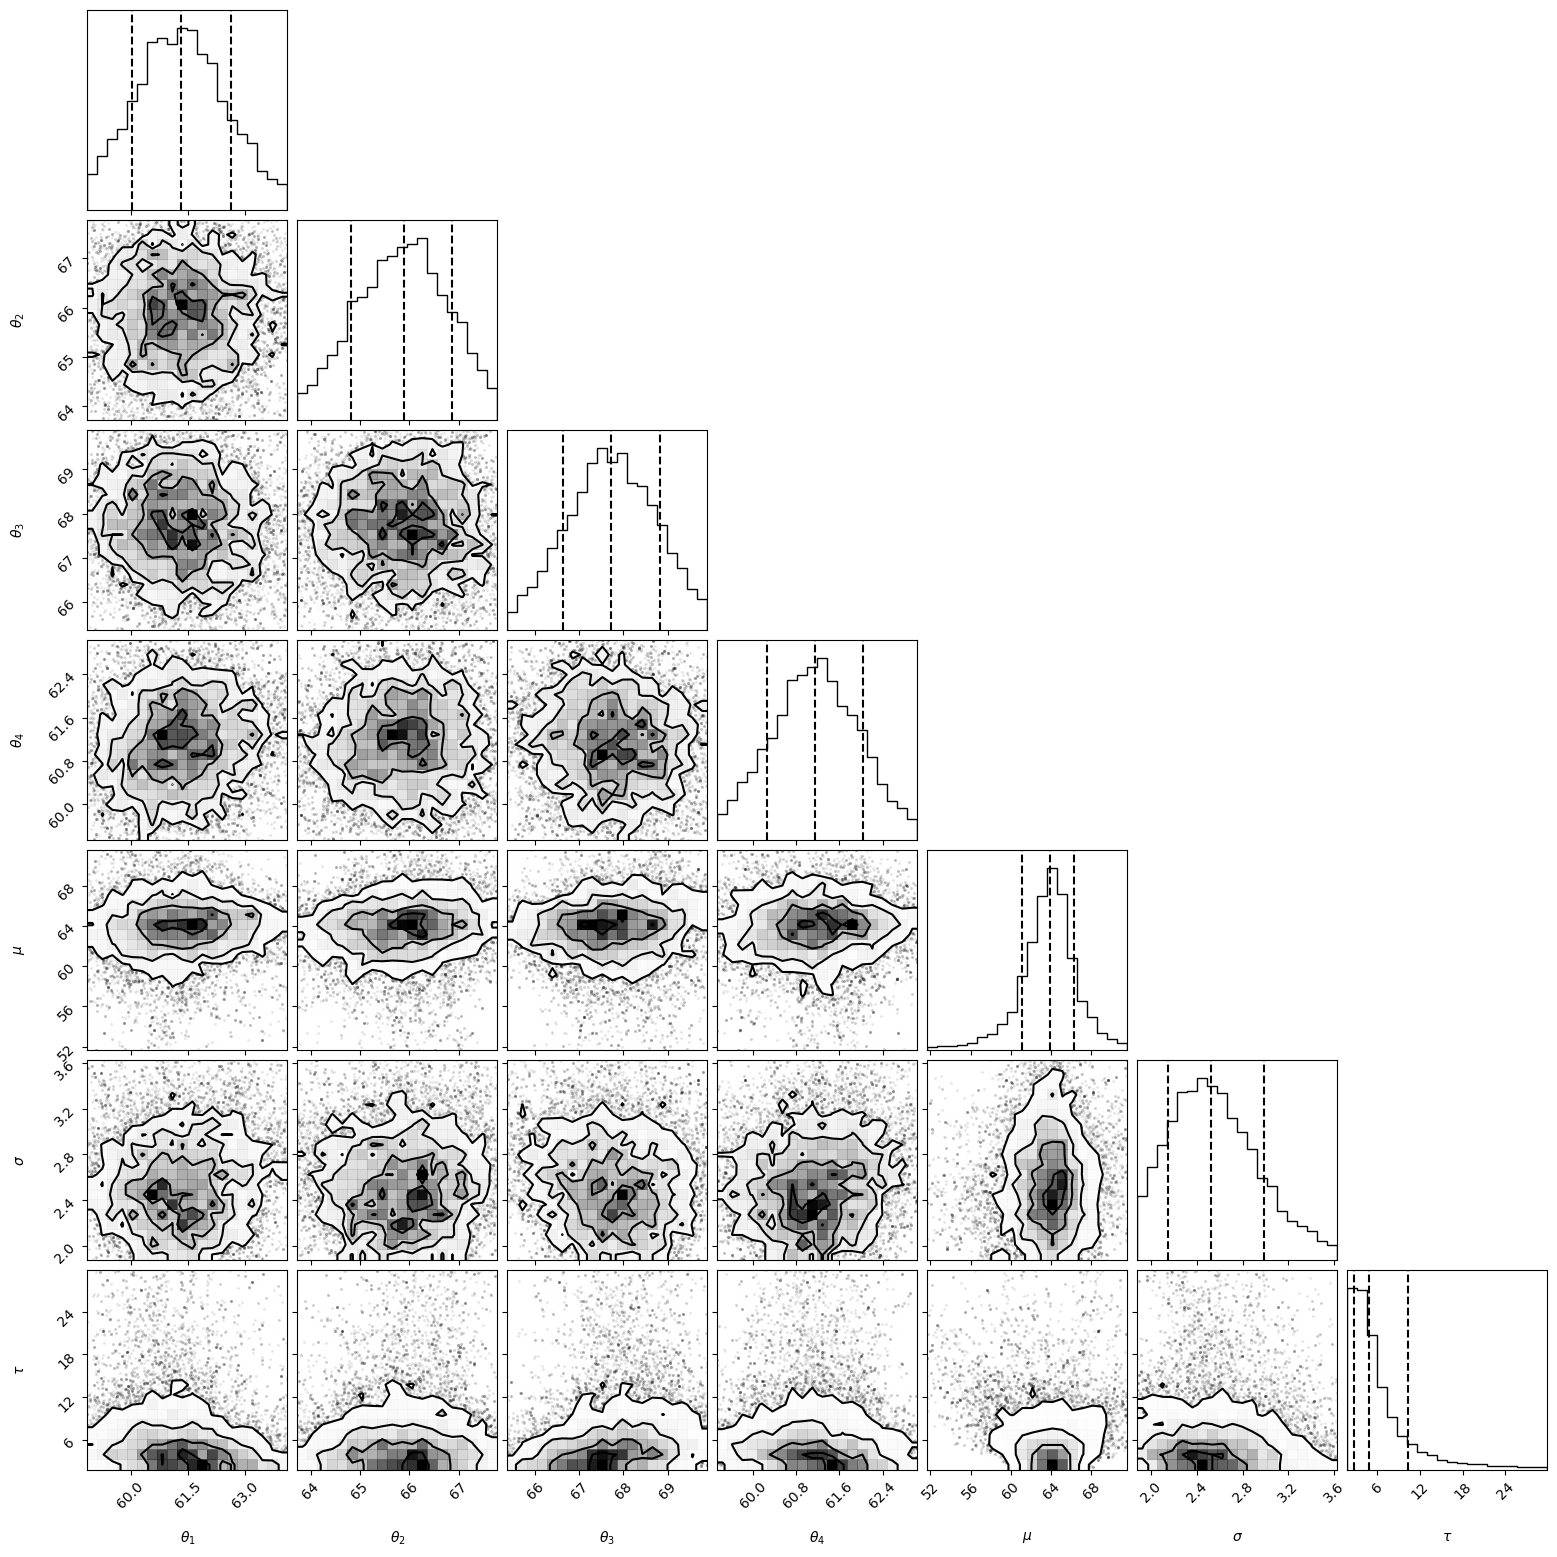

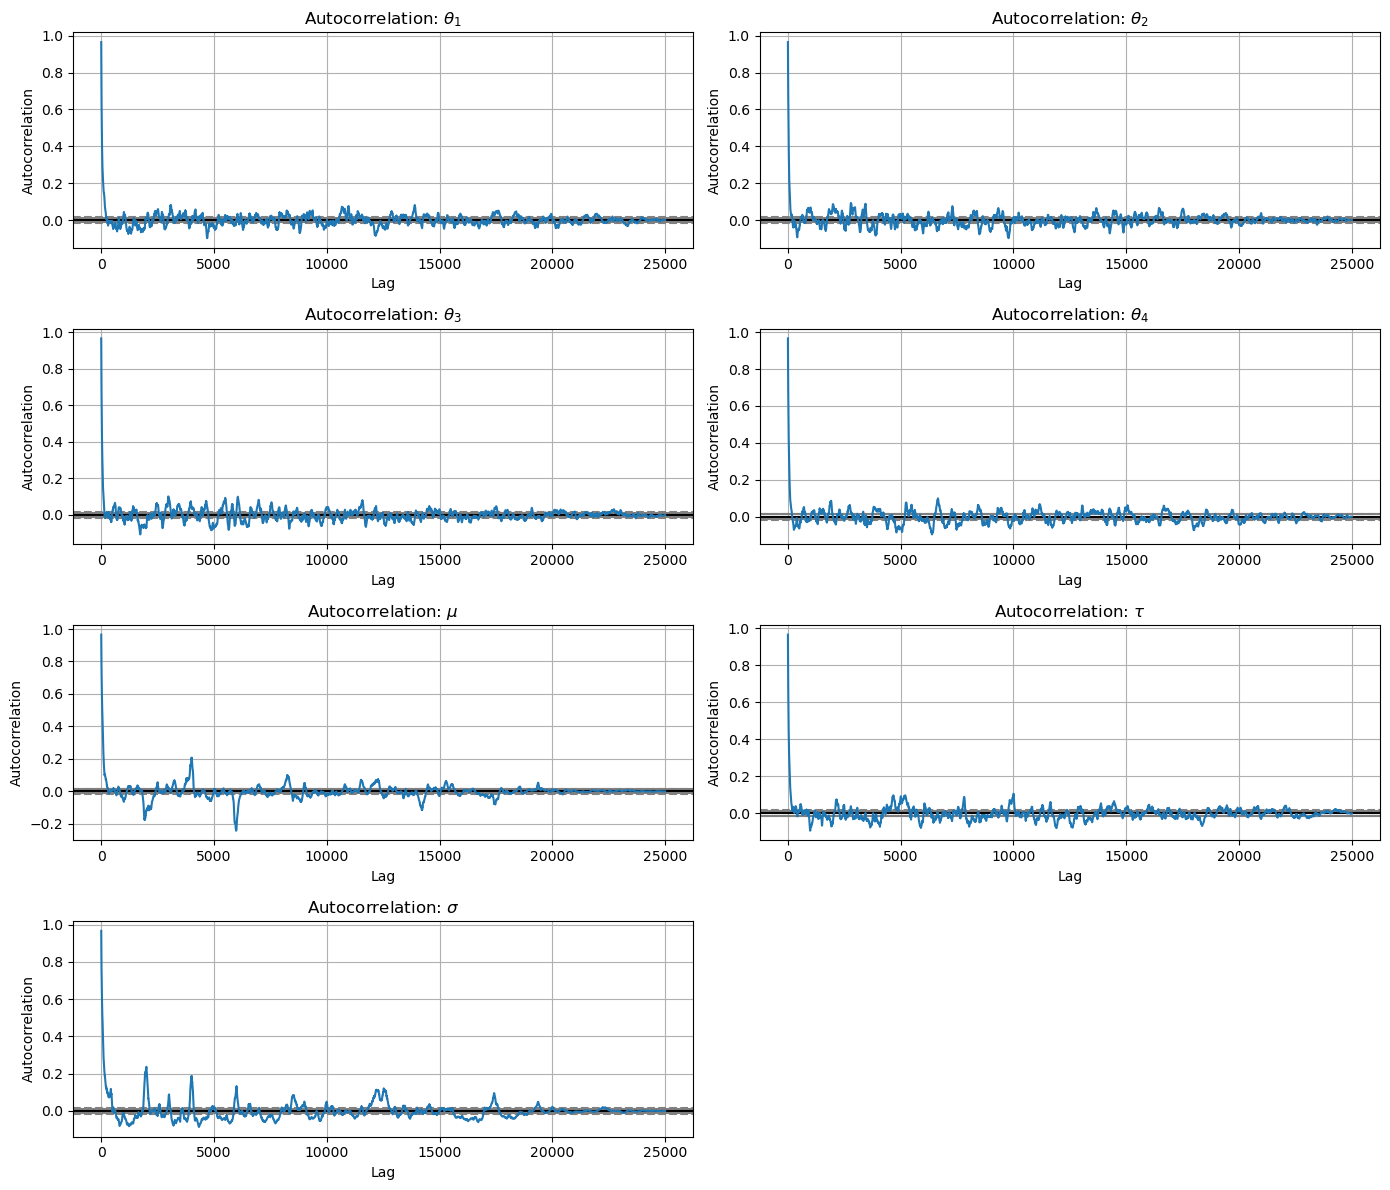

In [169]:
p_tex = np.array([r'$\theta_1$', r'$\theta_2$', r'$\theta_3$', r'$\theta_4$', r'$\mu$', r'$\tau$', r'$\sigma$'])

fig, axes = plt.subplots(4, 2, figsize=(14, 12))
axes = axes.flatten()

for param_idx in range(7):
    # Use the first chain for autocorrelation plot
    chain_data = emcee_trace[0, param_idx, :]
    
    # Create a pandas Series for autocorrelation_plot
    import pandas as pd
    series = pd.Series(chain_data)
    
    autocorrelation_plot(series, ax=axes[param_idx])
    axes[param_idx].set_title(f'Autocorrelation: {p_tex[param_idx]}')
    axes[param_idx].set_xlabel('Lag')
    axes[param_idx].set_ylabel('Autocorrelation')
    axes[param_idx].grid(True)

# Remove the extra subplot
axes[7].axis('off')

plt.tight_layout()
plt.show()


<!-- END QUESTION -->

***

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit the zip file to Gradescope!

In [170]:
# Save your notebook first, then run this cell to export your submission.
grader.export()